In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

music_data = pd.read_csv("Resources/top10s.csv", encoding = "ISO-8859-1")

In [22]:
music_df = pd.DataFrame(music_data)


In [42]:
columns = {"title": "Title", "artist": "Artist", "top genre": "Top Genre", "year": "Year", "bpm": "Beats per Minute (BPM)", 
           "nrgy": "Energy", "dnce": "Danceability", "dB": "Loudness (dB)", "live": "Liveness", "val": "Valence", 
           "dur": "Duration (sec)", "acous": "Acousticness", "spch": "Speechiness", "pop": "Popularity"}

clean_music_df = music_df.rename(columns = columns)


In [24]:
#Only focused on the colums that are important: Made a DF
music_subset_data_df=pd.DataFrame(clean_music_df,columns=['Title','Artist','Year','Energy',
                                                          'Danceability','Valence','Popularity','Top Genre'])


In [25]:
#Changed all subgenres of 'pop' to pop
music_subset_data_df['Top Genre'] = music_subset_data_df['Top Genre'].replace(
    {"acoustic pop":"pop",
"art pop":"pop",
"australian pop":"pop","barbadian pop":"pop","baroque pop":"pop",
     "canadian pop":"pop","candy pop":"pop","colombian pop":"pop",
     "dance pop":"pop","danish pop":"pop","electropop":"pop",
     "folk-pop":"pop","french indie pop":"pop","hip pop":"pop",
     "indie pop":"pop","moroccan pop":"pop"})


In [43]:
#Averages of the DataFrame
avg_music_data_by_year_df=music_subset_data_df.groupby('Year').mean()
avg_music_data_by_year_df

,Energy,Danceability,Valence,Popularity
Year,,,,
2010,77.901961,64.529412,57.000000,64.254902
2011,74.886792,63.641509,53.698113,61.867925
2012,75.485714,65.714286,64.171429,67.771429
2013,73.873239,62.042254,53.183099,63.985915
2014,67.775862,62.534483,52.086207,62.706897
2015,70.336842,63.663158,52.526316,64.568421
2016,67.237500,63.325000,45.150000,64.162500
2017,69.169231,65.369231,52.276923,69.015385
2018,65.468750,67.203125,48.765625,72.437500


In [27]:
#Indexed by genre and defined pop variables
genre_indexed = music_subset_data_df.set_index("Top Genre")


pop_valence = genre_indexed.loc["pop", "Valence"]

pop_energy = genre_indexed.loc["pop", "Energy"]

pop_danceability = genre_indexed.loc["pop", "Danceability"]

pop_popularity = genre_indexed.loc["pop", "Popularity"]


In [28]:
# genres = music_genre_group["Top Genre"].unique()
# no_pop_genres = ['alaska indie', 'alternative r&b', 'atl hip hop', 
#                  'australian dance', 'australian hip hop', 'belgian edm', 
#                  'big room', 'boy band', 'british soul', 'brostep',
#                  'canadian contemporary r&b', 'canadian hip hop', 'canadian latin', 
#                  'celtic rock', 'chicago rap', 'complextro', 'contemporary country',
#                  'detroit hip hop', 'downtempo', 'edm', 'electro', 'electro house', 
#                  'electronic trap', 'escape room', 'hip hop', 'hollywood', 'house', 
#                  'irish singer-songwriter', 'latin', 'metropopolis', 'neo mellow',
#                  'permanent wave', 'tropical house']

In [54]:
#Made a DF with no pop songs

no_pop = genre_indexed.drop('pop')
no_pop_df = pd.DataFrame(no_pop)


no_pop_df_grouped = no_pop_df.groupby('Year')
no_pop_means = no_pop_df_grouped.mean()
no_pop_means_df = pd.DataFrame(no_pop_means)
no_pop_means_df

,Energy,Danceability,Valence,Popularity
Year,,,,
2010,87.833333,66.333333,57.500000,56.333333
2011,66.000000,59.250000,37.000000,69.500000
2012,72.750000,62.750000,50.250000,76.250000
2013,74.562500,59.812500,49.500000,66.000000
2014,59.133333,53.933333,38.666667,62.600000
2015,67.888889,56.888889,36.666667,67.944444
2016,58.176471,54.941176,38.235294,57.882353
2017,69.100000,59.850000,45.650000,68.100000
2018,65.222222,63.444444,43.444444,72.666667


In [56]:
#Defined Variables: 
pval_mean = pop_valence.mean()
pnrg_mean = pop_energy.mean()
pdance_mean = pop_danceability.mean()


all_valence = avg_music_data_by_year_df["Valence"]
all_nrg = avg_music_data_by_year_df["Energy"]
all_dance = avg_music_data_by_year_df["Danceability"]


no_pop_val = no_pop_means_df["Valence"]
no_pop_nrg = no_pop_means_df["Energy"]
no_pop_dance = no_pop_means_df["Danceability"]

years = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]




Year
2010    57.500000
2011    37.000000
2012    50.250000
2013    49.500000
2014    38.666667
2015    36.666667
2016    38.235294
2017    45.650000
2018    43.444444
2019    58.800000
Name: Valence, dtype: float64

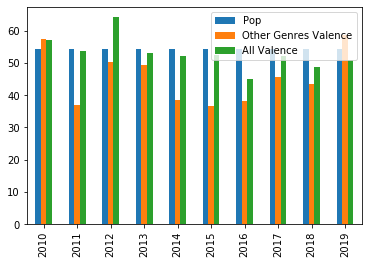

In [61]:
avg_valence_df = pd.DataFrame({"Pop": pval_mean,"Other Genres Valence":no_pop_val, "All Valence":all_valence}, index=years)
avg_valence_df.plot.bar()
plt.savefig("ValenceCompare.png")

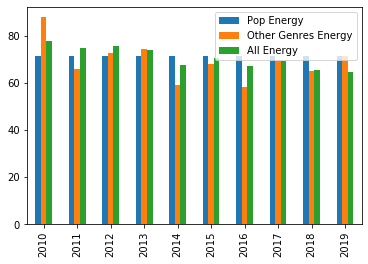

In [59]:
avg_energy_df = pd.DataFrame({"Pop Energy": pnrg_mean,"Other Genres Energy":no_pop_nrg, "All Energy":all_nrg}, index=years)
avg_energy_df.plot.bar()
plt.savefig("EnergyCompare.png")

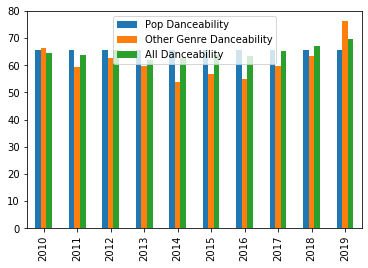

In [60]:
avg_dance_df = pd.DataFrame({"Pop Danceability": pdance_mean, "Other Genre Danceability":no_pop_dance,
                             "All Danceability":all_dance}, index=years)
avg_dance_df.plot.bar()